# Recap

Previously:

* Text sources (Wikipedia, web crawls, ...)
* Basic text processing tasks (tokenization, part-of-speech tagging, ...)
* Off-the-shelf tools for performing these tasks

<img src="https://raw.githubusercontent.com/TurkuNLP/Text_Mining_Course/master/figs/english_parsing_example.png" width="90%" align="left">

---

<img src="https://raw.githubusercontent.com/TurkuNLP/Text_Mining_Course/master/figs/finnish_parsing_example2.png" width="90%" align="left">

This time:

# Named Entity Recognition

* Recognize mentions of *named entities* (people, places, companies, etc.) and their types (`PER[SON]`, `LOC[ATION]`, etc.) in text
    * Commonly expanded to include also mentions of e.g. dates
    * In specialized domains, recognize names of e.g. genes, proteins, chemicals, ...
* Basic task in information extraction: need to know what things are talked about
* Reliable for well-studied text domains in resource-rich languages (e.g. English news), often over 90% precision and recall
    * Much worse for e.g. Finnish Twitter

<img src="https://raw.githubusercontent.com/TurkuNLP/Text_Mining_Course/master/figs/english_ner_example.png">

---

<img src="https://raw.githubusercontent.com/TurkuNLP/Text_Mining_Course/master/figs/finnish_ner_example.png" width="90%" align="left">

### Approaches

* Dictionary lookup: simple and fast, but no list is complete, no answer to ambiguity (e.g. "Nokia" as `ORG` vs `LOC`, "Bush" as `PER` vs common noun) 
* Rule-based systems: able to take context into account, but require manual tuning, can be brittle
* Machine learning: state-of-the-art results, can be retrained, but require manual annotation (supervised)

# Sequence labeling

* Fundamental machine learning task: assign a class (label) to each item in a sequence
    * Given observed input sequence ***x*** = { *x<sub>1</sub>*, *x<sub>2</sub>*, ... *x<sub>n</sub>* }, predict outputs ***y*** = { *y<sub>1</sub>*, *y<sub>2</sub>*, ... *y<sub>n</sub>* }
* Examples in NLP: part-of-speech tagging, chunking, **named entity recognition**, speech recognition

<hr>
<b>
    
```
x:    The  quick  brown  fox   jumps  over  the  lazy  dog
       ↓     ↓      ↓     ↓     ↓      ↓     ↓    ↓     ↓
y:    DET   ADJ    ADJ   NOUN  VERB   ADP   DET  ADJ   NOUN
```

</b>
<hr>

* Also: time sequences, biological sequences (DNA, amino acid), etc.
* Simply predicting ***x*** ↦ *y<sub>i</sub>* separately for each *y<sub>i</sub>* misses dependencies between outputs 
    * For example, in English, `ADJ` and `DET` are likely before `NOUN` but unlikely after

## NER as sequence labeling

* Given a sequence of words, determine for each whether it is (a part of) a name
* *Begin-In-Out* (BIO) encoding:
    * A token can <b>B</b>egin an entity, be <b>I</b>nside an entity, or be <b>O</b>utside an entity
    * Tags also encode entity type: **B-PER**, **I-PER**, **B-ORG**, **I-ORG**
* NER as multiclass classification: assign each word to one class

<hr>

```
x:    Adams  will  miss  England's   opening  World   Cup  qualifier
        ↓     ↓     ↓       ↓           ↓       ↓      ↓      ↓
y:    B-PER   O     O     B-LOC         O     B-MISC I-MISC   O
```

<hr>

* The same approach can also be used for e.g. chunking (partial parsing)
* Limitation: discontinuous and overlapping spans

# Learning sequence labeling

* Supervised machine learning: requires data for training
    * We assume examples of inputs ***x*** with correct outputs ***y*** (typically manually annotated)
    * Train ML method to predict outputs for new, unseen inputs → Need to *generalize*, not simply memorize (x,y) pairs from training data
* Key question: how to represent the data to the ML method as *features*
    * Examples: words (``Finland``) prefixes/suffixes (`Fin-`, `-and`), POS tags (`NOUN`), word shape (`STARTS-WITH-CAPITAL`), ...


## Naive Bayes

* Simple probabilistic classification method popularized by success in spam filtering
* Predict probability each class <i>y</i> given input <i>x</i> using Bayes' rule $P(y|x) = \frac{P(y)P(x|y)}{P(x)}$, pick most likely 
* Estimate probabilities based on (x,y) counts in training data (+smoothing), e.g.
    * Prior: `P(B-PER) = count(*, B-PER) / total-examples`
    * Conditional: `P(Adam|B-PER) = count(Adam, B-PER) / count(*, B-PER)`
* Simple and fast, but limited: assumes independence of features (the "naive" part -- almost always false!) and predictions (no notion of sequence)

## Hidden Markov Models (HMM)

* "Sequence version" of Naive Bayes: in addition to output probabilities, model also *transition probabilities* $P(y_i|y_{i-1})$
    * Markov assumption: probability of state depends only on previous state (not whole history)

<img src="https://raw.githubusercontent.com/TurkuNLP/Text_Mining_Course/master/figs/bayes_hmm.png" width="50%">

<div style="text-align:center; color:gray; font-size:80%">(Figure modified from <a href="https://arxiv.org/pdf/1011.4088v1.pdf">Sutton and McCallum (2011)</a>)

* Assume an underlying "hidden" sequence of class labels, which generates the observed data

<hr>
<b>
    
```
y:    DET →  ADJ  →  ADJ →  NOUN → VERB → ADP → DET → ADJ → NOUN
       ↓      ↓       ↓      ↓      ↓      ↓     ↓     ↓     ↓
x:    The   quick   brown   fox   jumps   over  the  lazy   dog
```

</b>
<hr>

* Transition probabilities can also be straightforwardly estimated from data, e.g.
    * `P(I-PER|B-PER) = count-seq(I-PER, B-PER) / count-seq(*, B-PER)`
* Decoding: Viterbi algorithm - efficient polynomial algorithm to find the best hidden sequence of labels for the observed data
* Incorporates sequence information, but otherwise retains the independence assumptions from Naive Bayes


## Conditional Random Fields (CRF)

(Specifically, linear-chain CRFs)

* *Discriminative* sequence classifier: estimate conditional probability $P(\textbf{y}|\textbf{x})$ (this is what we're interested in)
    * We know the observed data (and don't care about it's probability) and want to predict the output (i.e. discriminate between possible outputs)
    * (By contrast, *generative* models such as NB and HMM estimate the joint distribution $P(\textbf{x},\textbf{y})$)

<img src="https://raw.githubusercontent.com/TurkuNLP/Text_Mining_Course/master/figs/sutton_mccallum_models.png" width="80%">

<div style="text-align:center; color:gray; font-size:80%">(Figure modified from <a href="https://arxiv.org/pdf/1011.4088v1.pdf">Sutton and McCallum (2011)</a>)

* Avoid the independence assumptions made by HMMs (HMM is a special case of CRF)
* The go-to ML method for many sequence classification tasks since its introduction in 2001 ([paper](https://people.cs.umass.edu/~mccallum/papers/crf-icml01.ps))
    * (Many recent methods combine feature learning with CRF loss functions)
* Trained iteratively using gradient descent; can get stuck in a local optimum and can be slow
* Decoded in much the same way as HMMs - efficient polynomial algorithm to find the best sequence of labels

We won't go into any real details here, you can check out one of the many tutorials out there if you want to know more about the inner workings of CRFs and the way they're trained (e.g. [this one](http://www.cs.upc.edu/~aquattoni/AllMyPapers/crf_tutorial_talk.pdf)). For a comprehensive introduction, look <a href="https://arxiv.org/pdf/1011.4088v1.pdf">here</a>.

---

### Implementations

* [CRFsuite](http://www.chokkan.org/software/crfsuite/) is a good general CRF training software
* [sklearn-crfsuite](https://sklearn-crfsuite.readthedocs.io/en/latest/) CRFsuite Python wrapper
* [NERSuite](http://nersuite.nlplab.org/) a driver script for *CRFsuite* with predefined features tuned for the NER task
* [CoreNLP](https://stanfordnlp.github.io/CoreNLP/) also has a NER annotator (remember we played with it on the first lectures)

# Evaluation

Machine learning datasets are commonly split into three parts:

* Training data: used to train the ML method
* Development data: used to evaluate and set hyperparameters during method development
* Test data: used to evaluate a finished method

(You must *never* optimize to your test data!)

Sequence tagging methods are typically evaluated using the following metrics:

* precision: fraction of predicted items that were correct
* recall: fraction of correct items that were predicted
* F1-score: harmonic mean of precision and recall

---

### Sidenote

For convenience, we will below use word-level metrics. However, instead of looking at whether individual words are tagged correctly or incorrectly, the most commonly used metrics for NER are based on the recognition of entity mentions.

This means that a correctly tagged multi-word mention such as `Time Warner Cable` counts as one correct name, not three correct tags. (No partial credit is given for e.g. `Time Warner`.) For datasets with many multi-word mentions, this is a considerably more demanding metric.

(If you're interested, there's a python implementation at https://github.com/spyysalo/conlleval.py)

<hr>

#  Training data for NER

Supervised machine learning methods require annotated data for training. Datasets available for various languages and domains, e.g.:

* https://www.clips.uantwerpen.be/conll2002/ner/: Spanish, Dutch
* https://www.clips.uantwerpen.be/conll2003/ner/: English, German
* https://github.com/mpsilfve/finer-data: Finnish
* http://biocreative.org: English (biomedical)
* https://catalog.ldc.upenn.edu/LDC2013T19: English, Mandarin Chinese, Arabic, Chinese

---

In the following practical, we offer two options

* Finnish using data from https://github.com/mpsilfve/finer-data ([raw data](https://raw.githubusercontent.com/mpsilfve/finer-data/master/data/digitoday.2014.train.csv)) 
* English using data from https://www.clips.uantwerpen.be/conll2003/ner/

We'll use versions parsed using [Turku neural parser](https://turkunlp.org/Turku-neural-parser-pipeline), which you should already be familiar with ([online demo](http://bionlp-www.utu.fi/parser_demo/)).

In [1]:
%reload_ext autoreload
%autoreload 2
%run lib/conllu.ipynb


train_sentences = read_conll('data/finer-featurized/digitoday.2014.train.conllu')
devel_sentences = read_conll('data/finer-featurized/digitoday.2014.dev.conllu')
test_sentences = read_conll('data/finer-featurized/digitoday.2015.test.conllu')
EXAMPLE_IDX = 186    # index of example sentence in training data

# NOTE: if you prefer to run this notebook with English examples,
# uncomment the following lines:

# train_sentences = read_conll('data/conll03-featurized/eng.train.conllu')
# devel_sentences = read_conll('data/conll03-featurized/eng.dev.conllu')
# test_sentences = read_conll('data/conll03-featurized/eng.test.conllu')
# EXAMPLE_IDX = 219    # index of example sentence in training data


example_sentence = train_sentences[EXAMPLE_IDX]

print('\n'.join('\t'.join(w) for w in example_sentence))

O	Halvemman	halpa	ADJ	A	Case=Gen|Degree=Cmp|Number=Sing	2	amod	_	_
O	hintaluokan	hinta#luokka	NOUN	N	Case=Gen|Number=Sing	3	nmod:poss	_	_
O	älypuhelimista	äly#puhelin	NOUN	N	Case=Ela|Number=Plur	4	nmod	_	_
B-PRO	Nokia	Nokia	PROPN	N	Case=Nom|Number=Sing	8	nsubj	_	_
I-PRO	Lumia	Lumia	PROPN	N	Case=Nom|Number=Sing	4	flat:name	_	_
I-PRO	520	520	NUM	Num	NumType=Card	4	nummod	_	_
O	on	olla	AUX	V	Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin|Voice=Act	8	aux	_	_
O	menestynyt	menestyä	VERB	V	Case=Nom|Degree=Pos|Number=Sing|PartForm=Past|VerbForm=Part|Voice=Act	0	root	_	_
O	hyvin	hyvin	ADV	Adv	_	8	advmod	_	_
O	,	,	PUNCT	Punct	_	8	punct	_	_
B-PER	Ihamuotila	Ihamuotila	PROPN	N	Case=Nom|Number=Sing	12	nsubj	_	_
O	vahvisti	vahvistaa	VERB	V	Mood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act	8	parataxis	_	_
O	.	.	PUNCT	Punct	_	8	punct	_	_


## Data format

The data is in CoNLL-U format (https://universaldependencies.org/format.html), where the TAB-separated fields are defined as

```
    ID: Word index.
    FORM: Word form or punctuation symbol.
    LEMMA: Lemma or stem of word form.
    UPOS: Universal part-of-speech tag.
    XPOS: Language-specific part-of-speech tag.
    FEATS: List of morphological features.
    HEAD: Head of the current word.
    DEPREL: Universal dependency relation to the HEAD.
    DEPS: Enhanced dependency graph.
    MISC: Any other annotation.
```

(The `ID` field is used for the tag.)

We'll mostly be focusing on the first six fields or so.

In [2]:
%run lib/visualization.ipynb

conllu_cols = ["TAG", "FORM", "LEMMA", "UPOS", "XPOS", "FEATS", "HEAD", "DEPREL", "DEPS", "MISC"]

show_table(example_sentence, columns=conllu_cols)

TAG,FORM,LEMMA,UPOS,XPOS,FEATS,HEAD,DEPREL,DEPS,MISC
O,Halvemman,halpa,ADJ,A,Case=Gen|Degree=Cmp|Number=Sing,2,amod,_,_
O,hintaluokan,hinta#luokka,NOUN,N,Case=Gen|Number=Sing,3,nmod:poss,_,_
O,älypuhelimista,äly#puhelin,NOUN,N,Case=Ela|Number=Plur,4,nmod,_,_
B-PRO,Nokia,Nokia,PROPN,N,Case=Nom|Number=Sing,8,nsubj,_,_
I-PRO,Lumia,Lumia,PROPN,N,Case=Nom|Number=Sing,4,flat:name,_,_
I-PRO,520,520,NUM,Num,NumType=Card,4,nummod,_,_
O,on,olla,AUX,V,Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin|Voice=Act,8,aux,_,_
O,menestynyt,menestyä,VERB,V,Case=Nom|Degree=Pos|Number=Sing|PartForm=Past|VerbForm=Part|Voice=Act,0,root,_,_
O,hyvin,hyvin,ADV,Adv,_,8,advmod,_,_
O,",",",",PUNCT,Punct,_,8,punct,_,_


<img src="https://raw.githubusercontent.com/TurkuNLP/Text_Mining_Course/master/figs/ner_parse_example.png">
<hr>
<img src="https://raw.githubusercontent.com/TurkuNLP/Text_Mining_Course/master/figs/english_parsing_example2.png">

Let's simplify that a bit:

In [3]:
cols = slice(0,4)
print('\n'.join('\t'.join(w[cols]) for w in example_sentence))
show_table([w[cols] for w in example_sentence], columns=conllu_cols[cols])

O	Halvemman	halpa	ADJ
O	hintaluokan	hinta#luokka	NOUN
O	älypuhelimista	äly#puhelin	NOUN
B-PRO	Nokia	Nokia	PROPN
I-PRO	Lumia	Lumia	PROPN
I-PRO	520	520	NUM
O	on	olla	AUX
O	menestynyt	menestyä	VERB
O	hyvin	hyvin	ADV
O	,	,	PUNCT
B-PER	Ihamuotila	Ihamuotila	PROPN
O	vahvisti	vahvistaa	VERB
O	.	.	PUNCT


TAG,FORM,LEMMA,UPOS
O,Halvemman,halpa,ADJ
O,hintaluokan,hinta#luokka,NOUN
O,älypuhelimista,äly#puhelin,NOUN
B-PRO,Nokia,Nokia,PROPN
I-PRO,Lumia,Lumia,PROPN
I-PRO,520,520,NUM
O,on,olla,AUX
O,menestynyt,menestyä,VERB
O,hyvin,hyvin,ADV
O,",",",",PUNCT


## Statistics

Overall statistics of the annotation:

In [4]:
def conll_stats(sentences, tag_idx=0):
    sent_count = len(sentences)
    word_count = sum(len(s) for s in sentences)
    tag_count = len(set(w[tag_idx] for s in sentences for w in s))
    return sent_count, word_count, tag_count

for label, sentences in (("Training", train_sentences),
                         ("Development", devel_sentences),
                         ("Test", test_sentences)):
    print("{:12s}: {} sentences,\t{} words,\t{} unique tags".format(label, *conll_stats(sentences)))

Training    : 13497 sentences,	180178 words,	13 unique tags
Development : 986 sentences,	13564 words,	13 unique tags
Test        : 3512 sentences,	46363 words,	13 unique tags


Tag distribution:

155944	O
8592	B-ORG
4270	B-PRO
2886	I-PRO
2029	B-PER
1937	I-ORG
1754	B-LOC
1094	I-PER
904	B-DATE
463	I-DATE
131	I-LOC
91	B-EVENT
83	I-EVENT


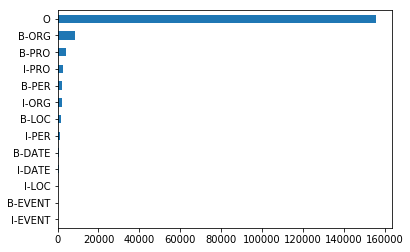

In [5]:
%matplotlib inline

from collections import Counter


def count_tags(sentences, tag_idx=0):
    counter = Counter(w[tag_idx] for s in sentences for w in s)
    for tag in sorted(counter, key=counter.get):
        yield tag, counter[tag]


tag_count = list(count_tags(train_sentences))

for tag, count in reversed(tag_count):
    print('{}\t{}'.format(count, tag))

plot_barh([c for t, c in tag_count], index=[t for t, c in tag_count]);    # ; is intended

Almost all words are tagged `O`, i.e. not part of a named entity. Let's see the rest in more detail:

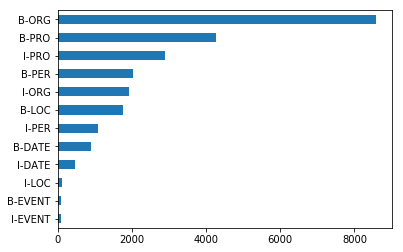

In [6]:
plot_barh([c for t, c in tag_count[:-1]], index=[t for t, c in tag_count[:-1]]);

The tag distribution is characteristic of NER datasets: the great majority of words are not part of any name, and the distribution of types is skewed.

(We'll be coming back to this.)

# Feature generation

We'll be looking at features derived from the following parts of the data:

```
[
 'B-ORG',                 # 0: tag
 'Nokian',                # 1: word form
 'Nokia',                 # 2: lemma
 'PROPN',                 # 3: universal part of speech tag
 'N',                     # 4: language-specific part of speech tag
 'Case=Gen|Number=Sing',  # 5: morphological features
 '2',                     #
 'nmod:poss,              # (... we will ignore the stuff here)
 '_',                     #
 '_'                      #
]
```

Separate the tags from the rest of the data, drop stuff we don't care so much about, and name the rest so that we can say things like `word.lemma` instead of `word[2]`.

In [7]:
from collections import namedtuple
from pprint import pprint as pretty_print


Word = namedtuple('Word', [
    'form',
    'lemma',
    'upos',
    'xpos',
    'morpho',
])


def reformat_sentences(sentences):
    # separate tags, drop parse fields, cast as namedtuples
    tags, data = [], []
    for sentence in sentences:
        tags.append([w[0] for w in sentence])
        data.append([Word(*w[1:6]) for w in sentence])
    return tags, data


train_y, train_data = reformat_sentences(train_sentences)
devel_y, devel_data = reformat_sentences(devel_sentences)
test_y, test_data = reformat_sentences(test_sentences)

pretty_print(train_data[EXAMPLE_IDX])
pretty_print(train_y[EXAMPLE_IDX])

[Word(form='Halvemman', lemma='halpa', upos='ADJ', xpos='A', morpho='Case=Gen|Degree=Cmp|Number=Sing'),
 Word(form='hintaluokan', lemma='hinta#luokka', upos='NOUN', xpos='N', morpho='Case=Gen|Number=Sing'),
 Word(form='älypuhelimista', lemma='äly#puhelin', upos='NOUN', xpos='N', morpho='Case=Ela|Number=Plur'),
 Word(form='Nokia', lemma='Nokia', upos='PROPN', xpos='N', morpho='Case=Nom|Number=Sing'),
 Word(form='Lumia', lemma='Lumia', upos='PROPN', xpos='N', morpho='Case=Nom|Number=Sing'),
 Word(form='520', lemma='520', upos='NUM', xpos='Num', morpho='NumType=Card'),
 Word(form='on', lemma='olla', upos='AUX', xpos='V', morpho='Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin|Voice=Act'),
 Word(form='menestynyt', lemma='menestyä', upos='VERB', xpos='V', morpho='Case=Nom|Degree=Pos|Number=Sing|PartForm=Past|VerbForm=Part|Voice=Act'),
 Word(form='hyvin', lemma='hyvin', upos='ADV', xpos='Adv', morpho='_'),
 Word(form=',', lemma=',', upos='PUNCT', xpos='Punct', morpho='_'),
 Word(form='

## Define features

We will use good old fashioned *explicit* feature representation, manually specifying how each feature is derived from the input data.

(For feature learning, see deep learning courses)

In [8]:
def minimal_featurizer(sentence, idx):
    # Return features for word in index idx in given sentence
    word = sentence[idx]
    features = {
        'form': word.form,
        'upos': word.upos,
    }
    return features


def featurize_sentence(sentence, featurizer=minimal_featurizer):
    return [featurizer(sentence, i) for i in range(len(sentence))]


train_x = [featurize_sentence(s) for s in train_data]
devel_x = [featurize_sentence(s) for s in devel_data]
test_x = [featurize_sentence(s) for s in test_data]

pretty_print(train_x[EXAMPLE_IDX])
pretty_print(train_y[EXAMPLE_IDX])

[{'form': 'Halvemman', 'upos': 'ADJ'},
 {'form': 'hintaluokan', 'upos': 'NOUN'},
 {'form': 'älypuhelimista', 'upos': 'NOUN'},
 {'form': 'Nokia', 'upos': 'PROPN'},
 {'form': 'Lumia', 'upos': 'PROPN'},
 {'form': '520', 'upos': 'NUM'},
 {'form': 'on', 'upos': 'AUX'},
 {'form': 'menestynyt', 'upos': 'VERB'},
 {'form': 'hyvin', 'upos': 'ADV'},
 {'form': ',', 'upos': 'PUNCT'},
 {'form': 'Ihamuotila', 'upos': 'PROPN'},
 {'form': 'vahvisti', 'upos': 'VERB'},
 {'form': '.', 'upos': 'PUNCT'}]
['O',
 'O',
 'O',
 'B-PRO',
 'I-PRO',
 'I-PRO',
 'O',
 'O',
 'O',
 'O',
 'B-PER',
 'O',
 'O']


### Sidenote

We give features and tags interpretable names such as `form`, `upos`, and `B-PER` for our convenience only. As far as the machine learning method is concerned, these could be anything, e.g. `f1`, `f2`, and `t1`.

(In particular, there is no magic in pairings such as `B-PER` and `I-PER` -- these are opaque to the ML method.)

# CRF training and prediction

We use the [scikit-learn](https://scikit-learn.org/) version of [CRFSuite](http://www.chokkan.org/software/crfsuite/), a fast implementation of CRFs.

In [9]:
import sklearn_crfsuite


crf = sklearn_crfsuite.CRF(all_possible_transitions=True)

We next train (i.e. fit) the CRF on the data. (This takes some time and memory -- don't all run this at once!)

In [10]:
%%time
crf.fit(train_x, train_y)

CPU times: user 1min, sys: 2.43 s, total: 1min 3s
Wall time: 1min 24s


CRF(algorithm=None, all_possible_states=None, all_possible_transitions=True,
  averaging=None, c=None, c1=None, c2=None, calibration_candidates=None,
  calibration_eta=None, calibration_max_trials=None, calibration_rate=None,
  calibration_samples=None, delta=None, epsilon=None, error_sensitive=None,
  gamma=None, keep_tempfiles=None, linesearch=None, max_iterations=None,
  max_linesearch=None, min_freq=None, model_filename=None,
  num_memories=None, pa_type=None, period=None, trainer_cls=None,
  variance=None, verbose=False)

In [11]:
%%time
pred_y = crf.predict(devel_x)

CPU times: user 74 ms, sys: 10.3 ms, total: 84.3 ms
Wall time: 97.3 ms


(Prediction is *much* faster than training.)

# Evaluation

In [12]:
from sklearn_crfsuite.metrics import flat_accuracy_score as accuracy


print('Accuracy:\t{:.2%}'.format(accuracy(devel_y, pred_y)))

Accuracy:	94.94%


Tagging accuracy over 90%! Is that a great result?

In [13]:
from itertools import islice


word_seq = [w.form for s in devel_data for w in s]
gold_seq = [y for s in devel_y for y in s]
pred_seq = [y for s in pred_y for y in s]

for word, gold, pred in islice(zip(word_seq, gold_seq, pred_seq), 500, 530):
    print('{:20s}\t{}\t{}\t{}'.format(word, gold, pred, pred==gold))

Yhtiön              	O	O	True
konkurssipesän      	O	O	True
hoitajakaan         	O	O	True
ei                  	O	O	True
tiedä               	O	O	True
,                   	O	O	True
kuka                	O	O	True
palvelua            	O	O	True
oikein              	O	O	True
pyörittää           	O	O	True
.                   	O	O	True
Tvkaista.fi-verkko-osoitteesta	B-PRO	O	False
löytyy              	O	O	True
vain                	O	O	True
cgi-bin-hakemiston  	O	O	True
linkki              	O	O	True
.                   	O	O	True
TVKaista            	B-ORG	B-ORG	True
Oy:n                	I-ORG	O	False
konkurssipesää      	O	O	True
hoitavan            	O	O	True
lakimiehen          	O	O	True
Heikki              	B-PER	B-PER	True
Aaltosen            	I-PER	I-PER	True
mukaan              	O	O	True
tvkaista.fi-osoite  	O	O	True
on                  	O	O	True
suljettu            	O	O	True
hänen               	O	O	True
vaatimuksestaan     	O	O	True


Remember this?

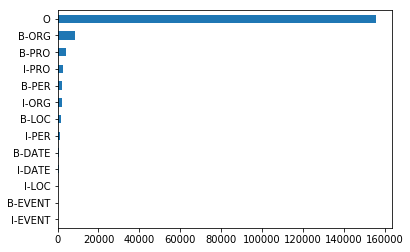

In [14]:
plot_barh([c for t, c in tag_count], index=[t for t, c in tag_count]);

In [15]:
O_count = len([t for t in gold_seq if t == 'O'])
total_count = len(gold_seq)
print("'O' tags: {}/{} ({:.2%})".format(O_count, total_count, O_count/total_count))

'O' tags: 11924/13564 (87.91%)


Due to the frequency of the `O` tag in the data, it's trivial to achieve high accuracy: just always predict `O`.

To get a better picture of what's going on, look at metrics for tags other than `O`. (The "out" class `O` is understood as negative.)

In [16]:
from sklearn_crfsuite.metrics import flat_f1_score as f1_score
from sklearn_crfsuite.metrics import flat_classification_report as classification_report


exclude_O = [t for t in crf.classes_ if t != 'O']

print(classification_report(devel_y, pred_y, labels=exclude_O))

              precision    recall  f1-score   support

       B-ORG       0.65      0.79      0.71       544
       B-PER       0.75      0.55      0.64       185
       I-PER       0.70      0.86      0.78        94
       B-LOC       0.87      0.64      0.74       268
      B-DATE       0.93      0.51      0.66        51
       B-PRO       0.78      0.32      0.46       173
       I-ORG       0.71      0.54      0.62       185
      I-DATE       1.00      0.59      0.74        34
       I-PRO       0.39      0.49      0.43        82
     B-EVENT       0.00      0.00      0.00         2
     I-EVENT       0.00      0.00      0.00         2
       I-LOC       0.75      0.30      0.43        20

   micro avg       0.70      0.63      0.66      1640
   macro avg       0.63      0.47      0.52      1640
weighted avg       0.72      0.63      0.65      1640



/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


(That's pretty bad.)

# Analysis

What did the CRF learn?

In [17]:
import eli5

from eli5.sklearn_crfsuite.explain_weights import sorted_for_ner


eli5.show_weights(crf, targets=sorted_for_ner(crf.classes_), show=['targets'], top=30)

The model is almost exclusively memorizing individual words. While this strategy might work for recognizing the names of months (for `DATE`), it will never scale to recognize people or organizations.

(Then again, we didn't give the model much else to work off ... `upos:` features do appear where relevant.)

Let's look at transitions weights, i.e. what the model learned about the probability of particular tags following other tags.

In [18]:
eli5.show_weights(crf, targets=sorted_for_ner(crf.classes_), show=['transition_features'])

From \ To,O,B-DATE,I-DATE,B-EVENT,I-EVENT,B-LOC,I-LOC,B-ORG,I-ORG,B-PER,I-PER,B-PRO,I-PRO
O,2.665,1.704,-1.844,1.403,-1.304,2.273,-1.219,1.695,-1.781,1.548,-1.582,2.168,-1.571
B-DATE,0.132,-0.558,5.261,0.87,-0.17,0.384,-0.135,-0.256,-0.281,-1.06,-0.22,-0.767,-0.351
I-DATE,-0.039,-1.281,4.345,-0.227,-0.132,-0.146,-0.105,-0.715,-0.231,-0.861,-0.165,-1.07,-0.294
B-EVENT,-0.555,-0.357,-0.093,-0.076,4.991,0.747,-0.053,-1.037,-0.135,-0.923,-0.107,-0.842,-0.128
I-EVENT,-0.871,-0.067,-0.068,-0.073,5.557,0.317,-0.053,-1.3,-0.124,-0.927,-0.106,-0.564,-0.127
B-LOC,0.413,-0.075,-0.623,1.341,-0.504,0.517,3.898,-1.091,-1.031,-2.419,-0.762,-1.255,-0.833
I-LOC,-0.527,0.3,-0.147,1.402,-0.138,0.21,4.058,-1.656,-0.322,-1.297,-0.219,-1.169,-0.245
B-ORG,1.61,0.435,-0.65,-0.398,-0.56,-0.076,-0.565,-1.183,5.288,-0.472,-0.885,0.95,-1.062
I-ORG,0.652,-0.35,-0.389,-0.43,-0.368,-0.766,-0.357,-0.706,5.168,-1.447,-0.603,-1.757,-0.641
B-PER,1.216,-0.7,-0.234,-0.256,-0.202,-1.175,-0.225,-1.608,-0.473,-2.097,6.421,-1.643,-0.408


The model has (mostly) learned that

* `B-` tags can follow `O`, but `I-` tags cannot (first row)
* An `O` tag can follow any tag (first column)
* Transitions from a `B-` tag to the corresponding `I-` tag are likely (e.g. `B-PER` -> `I-PER`) (diagonal)
* Transitions from `B-` to `B-` are unlikely. (diagonal)

This holds in the task setting and training data and should generalize to unseen data.

# Improvements

The above minimal featurizer only looked at the word form and part-of-speech tag, but we have more information than that, particularly lemmas and morphological features (e.g. whether a word is plural).

Also, recall that names such as `form:Maaliskuuta` are for humans only; for the machine learning method, this feature could equally well be called `f17465981`. The CRF *cannot know* e.g. that `form:Maaliskuuta` implies that the lowercased word is "maaliskuuta" or that the word has the prefix "Maaliskuu" and cannot infer such features; we have to tell it ourselves.

In [19]:
def less_minimal_featurizer(sentence, idx):
    word = sentence[idx]
    features = {
        'form': word.form,
        'form.lower()': word.form.lower(),
        'form[:2]': word.form[:2],
        'form[:3]': word.form[:3],
        'form[-2:]': word.form[-2:],
        'form[-3:]': word.form[-3:],
        'lemma': word.lemma,
        'lemma.lower()': word.lemma.lower(),
        'upos': word.upos,
        'xpos': word.xpos,
    }
    # morpho is either empty ("_") or like this: "Case=Nom|Number=Sing"
    if word.morpho == '_':
        features['morpho'] = '_'
    else:
        for attr, val in [m.split('=') for m in word.morpho.split('|')]:
            features['morpho.{}'.format(attr)] = val
    return features


train_x = [featurize_sentence(s, less_minimal_featurizer) for s in train_data]
devel_x = [featurize_sentence(s, less_minimal_featurizer) for s in devel_data]
test_x = [featurize_sentence(s, less_minimal_featurizer) for s in test_data]

pretty_print(train_x[EXAMPLE_IDX])

[{'form': 'Halvemman',
  'form.lower()': 'halvemman',
  'form[-2:]': 'an',
  'form[-3:]': 'man',
  'form[:2]': 'Ha',
  'form[:3]': 'Hal',
  'lemma': 'halpa',
  'lemma.lower()': 'halpa',
  'morpho.Case': 'Gen',
  'morpho.Degree': 'Cmp',
  'morpho.Number': 'Sing',
  'upos': 'ADJ',
  'xpos': 'A'},
 {'form': 'hintaluokan',
  'form.lower()': 'hintaluokan',
  'form[-2:]': 'an',
  'form[-3:]': 'kan',
  'form[:2]': 'hi',
  'form[:3]': 'hin',
  'lemma': 'hinta#luokka',
  'lemma.lower()': 'hinta#luokka',
  'morpho.Case': 'Gen',
  'morpho.Number': 'Sing',
  'upos': 'NOUN',
  'xpos': 'N'},
 {'form': 'älypuhelimista',
  'form.lower()': 'älypuhelimista',
  'form[-2:]': 'ta',
  'form[-3:]': 'sta',
  'form[:2]': 'äl',
  'form[:3]': 'äly',
  'lemma': 'äly#puhelin',
  'lemma.lower()': 'äly#puhelin',
  'morpho.Case': 'Ela',
  'morpho.Number': 'Plur',
  'upos': 'NOUN',
  'xpos': 'N'},
 {'form': 'Nokia',
  'form.lower()': 'nokia',
  'form[-2:]': 'ia',
  'form[-3:]': 'kia',
  'form[:2]': 'No',
  'form[:3]':

Re-train and evaluate with the improved feature representation:

In [20]:
%%time
crf = sklearn_crfsuite.CRF(all_possible_transitions=True)
crf.fit(train_x, train_y)
pred_y = crf.predict(devel_x)

CPU times: user 1min 30s, sys: 2.13 s, total: 1min 32s
Wall time: 1min 40s


In [21]:
print(classification_report(devel_y, pred_y, labels=exclude_O))

              precision    recall  f1-score   support

       B-ORG       0.82      0.80      0.81       544
       B-PER       0.88      0.77      0.82       185
       I-PER       0.85      0.90      0.88        94
       B-LOC       0.93      0.90      0.91       268
      B-DATE       0.96      0.88      0.92        51
       B-PRO       0.75      0.58      0.65       173
       I-ORG       0.78      0.69      0.73       185
      I-DATE       0.97      0.82      0.89        34
       I-PRO       0.50      0.67      0.57        82
     B-EVENT       0.00      0.00      0.00         2
     I-EVENT       0.00      0.00      0.00         2
       I-LOC       1.00      0.40      0.57        20

   micro avg       0.82      0.77      0.80      1640
   macro avg       0.70      0.62      0.65      1640
weighted avg       0.83      0.77      0.79      1640



Much better.

In [22]:
eli5.show_weights(crf, targets=sorted_for_ner(crf.classes_), top=30)

From \ To,O,B-DATE,I-DATE,B-EVENT,I-EVENT,B-LOC,I-LOC,B-ORG,I-ORG,B-PER,I-PER,B-PRO,I-PRO
O,1.079,1.39,-2.466,1.128,-1.338,1.841,-1.252,1.367,-1.803,1.102,-1.65,1.796,-1.664
B-DATE,-1.177,-0.733,4.015,0.604,-0.103,-0.048,-0.101,-0.188,-0.151,-0.556,-0.19,-0.828,-0.266
I-DATE,-1.03,-1.51,4.592,-0.063,-0.05,-0.143,-0.048,-0.225,-0.048,-0.206,-0.043,-0.491,-0.111
B-EVENT,-1.709,-0.171,-0.133,-0.049,4.158,0.46,-0.047,-0.645,-0.083,-0.546,-0.047,-0.517,-0.085
I-EVENT,-2.008,-0.114,-0.041,-0.11,4.679,0.149,-0.076,-0.716,-0.063,-0.433,-0.036,-0.383,-0.068
B-LOC,-0.772,-0.058,-0.344,1.036,-0.36,1.12,3.665,-0.58,-1.169,-1.596,-0.324,-0.668,-0.426
I-LOC,-1.512,0.129,-0.253,0.551,-0.211,0.317,3.662,-1.005,-0.303,-0.6,-0.075,-0.585,-0.1
B-ORG,-0.06,0.324,-0.585,-0.249,-0.695,0.127,-0.587,-1.112,5.373,-0.542,-0.735,0.362,-1.507
I-ORG,-0.725,-0.222,-0.269,-0.231,-0.336,-0.255,-0.312,-0.379,5.54,-1.013,-0.38,-1.257,-0.584
B-PER,-0.139,-0.299,-0.146,-0.152,-0.212,-0.667,-0.224,-1.055,-0.454,-2.488,6.343,-1.212,-0.312


## Context features

When making a prediction for a word, the machine learning method only has access to the features defined for that word. The method it doesn't automatically "remember" previous words it has seen or look at words occurring later in the sentence.

However, we are not limited in this way and can directly represent the features of context words for the method:

In [23]:
def word_features(word, prefix=''):
    features = {
        prefix+'form': word.form,
        prefix+'form.lower()': word.form.lower(),
        prefix+'form[:2]': word.form[:2],
        prefix+'form[:3]': word.form[:3],
        prefix+'form[-2:]': word.form[-2:],
        prefix+'form[-3:]': word.form[-3:],
        prefix+'lemma': word.lemma,
        prefix+'lemma.lower()': word.lemma.lower(),
        prefix+'upos': word.upos,
        prefix+'xpos': word.xpos,
    }
    if word.morpho == '_':
        features[prefix+'morpho'] = '_'
    else:
        for attr, val in [m.split('=') for m in word.morpho.split('|')]:
            features[prefix+'morpho.{}'.format(attr)] = val
    return features


def context_featurizer(sentence, idx):
    features = word_features(sentence[idx], '0:')
    if idx > 0:
        features.update(word_features(sentence[idx-1], '-1:'))
    if idx < len(sentence)-1:
        features.update(word_features(sentence[idx+1], '+1:'))
    return features

train_x = [featurize_sentence(s, context_featurizer) for s in train_data]
devel_x = [featurize_sentence(s, context_featurizer) for s in devel_data]
test_x = [featurize_sentence(s, context_featurizer) for s in test_data]

pretty_print(train_x[EXAMPLE_IDX])

[{'+1:form': 'hintaluokan',
  '+1:form.lower()': 'hintaluokan',
  '+1:form[-2:]': 'an',
  '+1:form[-3:]': 'kan',
  '+1:form[:2]': 'hi',
  '+1:form[:3]': 'hin',
  '+1:lemma': 'hinta#luokka',
  '+1:lemma.lower()': 'hinta#luokka',
  '+1:morpho.Case': 'Gen',
  '+1:morpho.Number': 'Sing',
  '+1:upos': 'NOUN',
  '+1:xpos': 'N',
  '0:form': 'Halvemman',
  '0:form.lower()': 'halvemman',
  '0:form[-2:]': 'an',
  '0:form[-3:]': 'man',
  '0:form[:2]': 'Ha',
  '0:form[:3]': 'Hal',
  '0:lemma': 'halpa',
  '0:lemma.lower()': 'halpa',
  '0:morpho.Case': 'Gen',
  '0:morpho.Degree': 'Cmp',
  '0:morpho.Number': 'Sing',
  '0:upos': 'ADJ',
  '0:xpos': 'A'},
 {'+1:form': 'älypuhelimista',
  '+1:form.lower()': 'älypuhelimista',
  '+1:form[-2:]': 'ta',
  '+1:form[-3:]': 'sta',
  '+1:form[:2]': 'äl',
  '+1:form[:3]': 'äly',
  '+1:lemma': 'äly#puhelin',
  '+1:lemma.lower()': 'äly#puhelin',
  '+1:morpho.Case': 'Ela',
  '+1:morpho.Number': 'Plur',
  '+1:upos': 'NOUN',
  '+1:xpos': 'N',
  '-1:form': 'Halvemman',


In [24]:
%%time
crf = sklearn_crfsuite.CRF(all_possible_transitions=True)
crf.fit(train_x, train_y)
pred_y = crf.predict(devel_x)

CPU times: user 3min 49s, sys: 6.53 s, total: 3min 55s
Wall time: 4min 5s


In [25]:
print(classification_report(devel_y, pred_y, labels=exclude_O))

              precision    recall  f1-score   support

       B-ORG       0.86      0.82      0.84       544
       B-PER       0.93      0.84      0.89       185
       I-PER       0.92      0.88      0.90        94
       B-LOC       0.92      0.88      0.90       268
      B-DATE       0.96      0.92      0.94        51
       B-PRO       0.79      0.62      0.69       173
       I-ORG       0.81      0.76      0.78       185
      I-DATE       0.94      0.88      0.91        34
       I-PRO       0.56      0.61      0.58        82
     B-EVENT       0.00      0.00      0.00         2
     I-EVENT       0.00      0.00      0.00         2
       I-LOC       0.75      0.45      0.56        20

   micro avg       0.86      0.80      0.83      1640
   macro avg       0.70      0.64      0.67      1640
weighted avg       0.86      0.80      0.82      1640



In [26]:
eli5.show_weights(crf, targets=sorted_for_ner(crf.classes_), top=30)

From \ To,O,B-DATE,I-DATE,B-EVENT,I-EVENT,B-LOC,I-LOC,B-ORG,I-ORG,B-PER,I-PER,B-PRO,I-PRO
O,2.944,1.637,-2.113,0.831,-1.031,1.431,-1.553,1.283,-1.98,1.318,-1.67,2.009,-2.262
B-DATE,-0.343,-0.86,2.532,0.221,-0.086,-0.101,-0.077,-0.054,-0.073,-0.267,-0.095,-0.514,-0.167
I-DATE,-0.511,-1.039,2.731,-0.055,-0.061,-0.19,-0.043,0.286,-0.079,-0.033,-0.033,-0.343,-0.235
B-EVENT,-0.729,-0.138,-0.111,-0.067,2.373,0.128,-0.106,-0.45,-0.179,-0.195,-0.137,-0.316,-0.25
I-EVENT,-1.272,-0.127,-0.049,-0.132,2.905,-0.029,-0.142,-0.389,-0.206,-0.116,-0.125,-0.213,-0.2
B-LOC,-0.112,-0.143,-0.248,0.445,-0.432,0.814,2.726,0.026,-1.518,-0.464,-0.61,-0.458,-0.485
I-LOC,-0.755,0.018,-0.076,0.259,-0.253,0.029,2.24,-0.485,-0.406,-0.163,-0.18,-0.299,-0.199
B-ORG,-0.031,0.109,-0.307,-0.499,-0.902,0.179,-0.689,-0.312,4.568,0.893,-1.092,0.754,-2.241
I-ORG,-0.785,-0.213,-0.21,-0.262,-0.46,-0.047,-0.482,0.035,4.285,0.017,-0.687,-0.694,-0.82
B-PER,0.061,-0.155,-0.082,-0.131,-0.384,-0.452,-0.401,-0.29,-0.793,-0.959,4.56,-0.7,-0.68


## Let's have a look at the output

* Print sentences with named entities

In [27]:
def get_tagged(words, tags):
    # Get tagged spans from sequences of words and BIO tags
    tagged, current, current_type = [], [], None
    for word, tag in zip(words, tags):
        if tag[0] in 'OB' and current:    # current ends
            tagged.append((' '.join(current), current_type))
            current, current_type = [], None
        if tag[0] == 'B':
            current, current_type = [word], tag[2:]
        elif tag[0] == 'I':
            if not current:    # I without B, but nevermind
                current, current_type = [word], tag[2:]
            else:
                current.append(word)
                # TODO check that type agrees
        else:
            assert tag == 'O', 'unexpected tag {}'.format(tag)
    if current:    # span open at sentence end
        tagged.append((' '.join(current), current_type))
    return tagged


for sentence, predictions in islice(zip(devel_data, pred_y), 100):
    words = [w.form for w in sentence]
    tagged = get_tagged(words, predictions)
    print(' '.join(words))
    print('NEs: '+','.join('<{1}>{0}</{1}>'.format(text, type_) for text, type_ in tagged))
    print('-'*78)

Kairossa on samalla #äänestä parittajaa-viestillä tuhrittu myös Abdul Fattah al-Sisin vaalimainoksia .
NEs: <LOC>Kairossa</LOC>,<PER>Abdul Fattah al-Sisin</PER>
------------------------------------------------------------------------------
Kenraali al-Sisin johtama sotilasjuntta kaappasi vallan vaaleissa voittaneelta presidentti Muhammed Mursilta ja Muslimiveljeskunnalta , julisti veljeskunnan rikollisjärjestöksi ja tukahdutti mielenosoitukset yli tuhannen ihmisen kuolemaan johtaneella väkivallalla .
NEs: <PER>Muhammed Mursilta</PER>,<ORG>Muslimiveljeskunnalta</ORG>
------------------------------------------------------------------------------
Mursin islamistisen politiikan vastustajat näkevät al-Sisin pelastajana ja Egyptin tilanteen vakauttajana .
NEs: <PER>Mursin</PER>,<LOC>Egyptin</LOC>
------------------------------------------------------------------------------
Ihmisoikeusjärjestöt raportoivat sotilashallituksen syyllistyvän laajoihin väärinkäytöksiin .
NEs: 
-------------------

What are the most common names?

In [28]:
tagged_count = Counter()
for sentence, predictions in zip(devel_data, pred_y):
    words = [w.form for w in sentence]
    for text, type_ in get_tagged(words, predictions):
        tagged_count[(text, type_)] += 1

for (text, type_), count in tagged_count.most_common(50):
	print('{}\t{} ({})'.format(count, text, type_))

25	Facebook (ORG)
23	Google (ORG)
22	Googlen (ORG)
19	Yhdysvallat (LOC)
17	Yhdysvaltain (LOC)
14	Zuckerberg (PER)
13	Turkin (LOC)
12	Facebookin (ORG)
11	Kiinan (LOC)
10	Twitterin (PRO)
10	Applen (ORG)
10	Comcastin (ORG)
10	Pohjois-Korean (LOC)
9	Turkki (LOC)
9	Turkissa (LOC)
9	NSA:n (ORG)
9	Apple (ORG)
8	Lenovo (ORG)
8	Suomen (LOC)
8	Yahoo (ORG)
8	Twitter (PRO)
8	Samsungin (ORG)
8	FBI (ORG)
7	Mark Zuckerberg (PER)
7	Yhdysvalloissa (LOC)
7	Facebookissa (PRO)
7	Suomessa (LOC)
7	Valkoisen talon (ORG)
6	Yhdysvaltoja (LOC)
6	Kiina (LOC)
6	Dotcom (PER)
6	Facebookin (PRO)
6	Venäjällä (LOC)
6	OP:n (ORG)
6	Pohjois-Koreassa (LOC)
5	NSA (ORG)
5	Facebookista (PRO)
5	Kaliforniassa (LOC)
5	Venäjän (LOC)
5	Kiinassa (LOC)
5	Sonyn (ORG)
5	Sullivan (PER)
5	Pohjois-Koreaa (LOC)
5	Pohjois-Korea (LOC)
4	NSA:ta (ORG)
4	The New York Times (ORG)
4	Karpin (PER)
4	Karppi (PER)
4	F-Securen (ORG)
4	Googlea (ORG)


# Improve the model further

There are many ways that we could still try to further improve the model, for example

* Optimize hyperparameters, most importantly regularization parameters `c1` (L1) and `c2` (L2)
* Dictionaties (aka gazetteers): does the word appear in lists of known names of people, cities, countries, etc.
* Word shape features, e.g. "Turku" → "Aaaaa", "NLP" → "AAA", "123" → "###"
* Adding a bias term

(Exercise)

# Use the trained model to tag text from parsebank

(Exercise)